In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#open the data frame and read it, while giving it col names
df = pd.read_csv("automobile.csv", names = ['symboling','normalized-losses','make','fuel-type', 'aspiration','num-of-doors',
            'body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight',
            'engine-weight','num-of-cylinders','engine_size','fuel-system','bore','stroke',
            'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'])
#change the types of the data 
df = df.astype(dtype = np.int64, errors = 'ignore').astype(dtype = {'symboling': np.int64})

In [3]:
#find all ?. and change it to a np.nan which is a float
df = df.replace('?', np.nan)
#normalized-losses was giving me some issues, so i forced it to be a float type
df['normalized-losses'] = df['normalized-losses'].astype(np.float64)
#get any and all non numeric type. 
obj = df.columns[df.dtypes == 'object']
#get and and all numeric type
nummers = df.columns[df.dtypes != 'object']
#make a col for obj, and fill the missing(np.nan) data types with the mode
df[obj] =  df[obj].fillna(df[obj].mode())
#make a col for the nummers, and fill the missing(np.nan) data types with the mean
df[nummers] = df[nummers].fillna(df[nummers].mean())
#again, normalized-losses was giving me issues so i forced the data type to an int from a float
df['normalized-losses'] = df['normalized-losses'].astype(np.int64)
#made a new dataframe called df2
df2 = df
numofmake = len(df2['make'])
#should return the number of makes in the series
numofmake

205

In [4]:
#following the equation.
#i created a m from the min value in NL
m = df2['normalized-losses'].min()
#created a M from the max values in NL
M = df2['normalized-losses'].max()
#took the normalized loss and created an extra column for loss percentage using the equation given to us
df2['loss-percentage'] = (df2['normalized-losses']-m)/(M-m)
#round the data as prof wanted it
df2 = df2.round({'loss-percentage' :4})
df2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,loss-percentage
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88,...,mpfi,3.47,2.68,9,111,5000,21,27,13495,0.2984
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88,...,mpfi,3.47,2.68,9,111,5000,21,27,16500,0.2984
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94,...,mpfi,2.68,3.47,9,154,5000,19,26,16500,0.2984
3,2,164,audi,gas,std,four,sedan,fwd,front,99,...,mpfi,3.19,3.40,10,102,5500,24,30,13950,0.5183
4,2,164,audi,gas,std,four,sedan,4wd,front,99,...,mpfi,3.19,3.40,8,115,5500,18,22,17450,0.5183
5,2,122,audi,gas,std,two,sedan,fwd,front,99,...,mpfi,3.19,3.40,8,110,5500,19,25,15250,0.2984
6,1,158,audi,gas,std,four,sedan,fwd,front,105,...,mpfi,3.19,3.40,8,110,5500,19,25,17710,0.4869
7,1,122,audi,gas,std,four,wagon,fwd,front,105,...,mpfi,3.19,3.40,8,110,5500,19,25,18920,0.2984
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105,...,mpfi,3.13,3.40,8,140,5500,17,20,23875,0.4869
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99,...,mpfi,3.13,3.40,7,160,5500,16,22,7898,0.2984


In [38]:
g = df[df['make'] !='honda'].groupby(['make', 'horsepower'])
gdf = g.describe()
gdf['engine_size'][['min','mean','max']]

min   mean    max
make          horsepower                     
alfa-romero   111         130.0  130.0  130.0
              154         152.0  152.0  152.0
audi          102         109.0  109.0  109.0
              110         136.0  136.0  136.0
              115         136.0  136.0  136.0
              140         131.0  131.0  131.0
              160         131.0  131.0  131.0
bmw           101         108.0  108.0  108.0
              121         164.0  164.0  164.0
              182         209.0  209.0  209.0
chevrolet     48           61.0   61.0   61.0
              70           90.0   90.0   90.0
dodge         102          98.0   98.0   98.0
              145         156.0  156.0  156.0
              68           90.0   90.0   90.0
              88          122.0  122.0  122.0
isuzu         70           90.0   90.0   90.0
              78          111.0  111.0  111.0
              90          119.0  119.0  119.0
jaguar        176         258.0  258.0  258.0
              262         326.0  326.0  326.0
mazda         101          70.0   70.0   70.0
              120         140.0  140.0  140.0
              135          80.0   80.0   80.0
              64          122.0  122.0  122.0
              68           91.0   91.0   91.0
              72          134.0  134.0  134.0
              84          122.0  122.0  122.0
mercedes-benz 123         183.0  183.0  183.0
              155         234.0  234.0  234.0
...                         ...    ...    ...
porsche       207         194.0  194.0  194.0
              288         203.0  203.0  203.0
saab          110         121.0  121.0  121.0
              160         121.0  121.0  121.0
subaru        111         108.0  108.0  108.0
              69           97.0   97.0   97.0
              73          108.0  108.0  108.0
              82          108.0  108.0  108.0
              94          108.0  108.0  108.0
toyota        112          98.0   98.0   98.0
              116         146.0  146.0  146.0
              156         161.0  166.0  171.0
              161         171.0  171.0  171.0
              56          110.0  110.0  110.0
              62           92.0   92.0   92.0
              70           98.0   98.0   98.0
              73          110.0  110.0  110.0
              92          122.0  122.0  122.0
volkswagen    100         109.0  109.0  109.0
              110         136.0  136.0  136.0
              52           97.0   97.0   97.0
              68           97.0   97.0   97.0
              85          109.0  109.0  109.0
              88          109.0  109.0  109.0
              90          109.0  109.0  109.0
volvo         106         145.0  145.0  145.0
              114         141.0  141.0  141.0
              134         173.0  173.0  173.0
              160         141.0  141.0  141.0
              162         130.0  130.0  130.0

[81 rows x 3 columns]

In [99]:
#getting the size of the bins, by taking the max size and the min size then diving it by 10. 
#this in theory should give me the needed allocated size. 
df2['binned_engine_size'] = pd.cut(df2['engine_size'], [60,91,119,159,189,205,250,300,350], labels = ['xsmall','small','medium','large','xlarge','huge','earthkilller','universe killer'])
#df2['engine_size'].describe()
df2 = df2

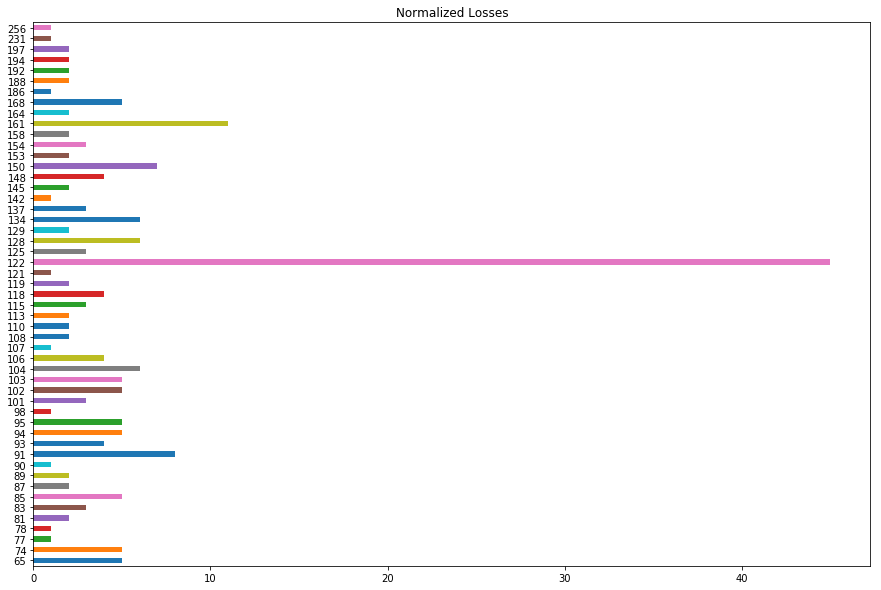

In [100]:
#created a figure using default values from the subplots()
fig = plt.subplots()
#spent way too much time on this. 
#used the pandas documentaion to toss this together. 
#get the value counts, sort by index, use matplotlib plot togive it a barh(h indicating horizontal), title, and a figure size. 
df2['normalized-losses'].value_counts().sort_index().plot(kind='barh',title='Normalized Losses', figsize = (15,10))

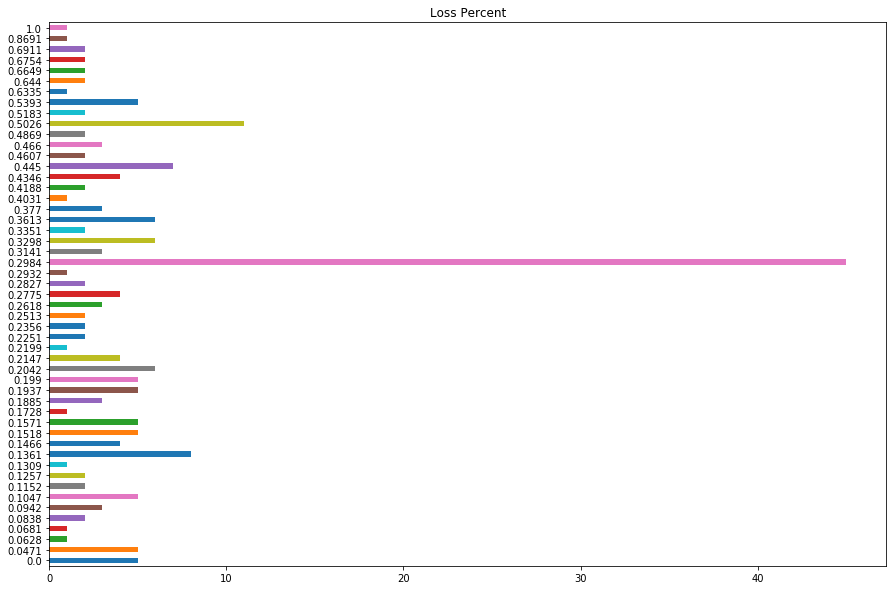

In [101]:
df2['loss-percentage'].value_counts().sort_index().plot(kind='barh',title='Loss Percent', figsize=(15,10))

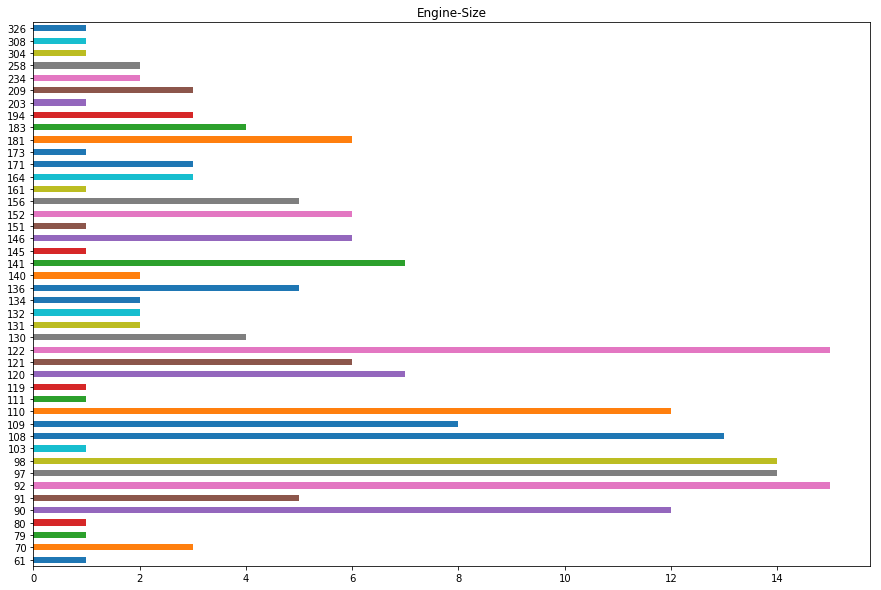

In [102]:
df2['engine_size'].value_counts().sort_index().plot(kind='barh',title='Engine-Size', figsize=(15,10))

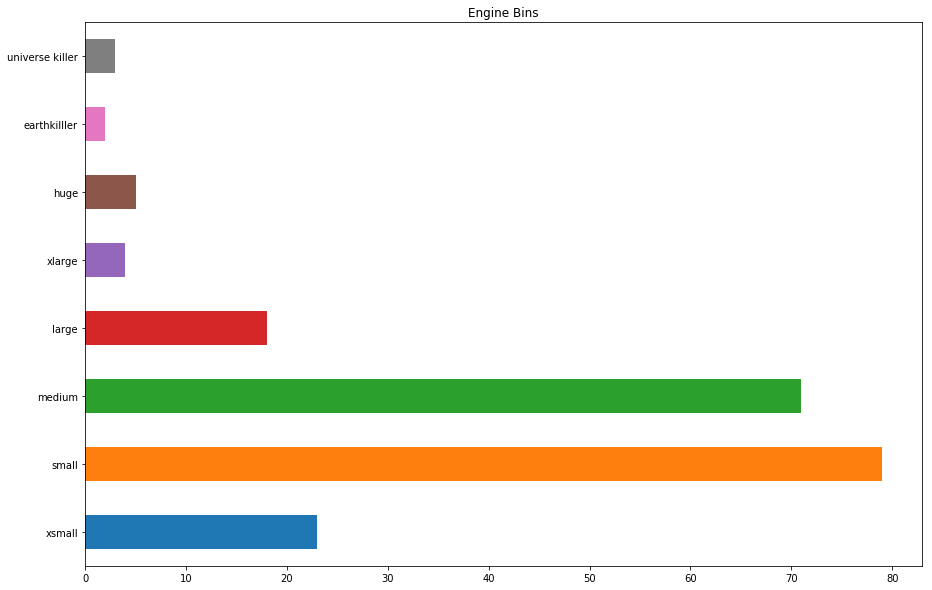

In [103]:
df2['binned_engine_size'].value_counts().sort_index().plot(kind='barh',title='Engine Bins', figsize=(15,10))

In [104]:
#pandas has a built in describe, so i just did a "sort" on the data type this comment will be the same for the rest below. 
df[df.columns[df.dtypes == 'object']].describe()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-weight,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,203,205,205,205,205,205,205,201,201,203,203,202
unique,22,2,2,2,5,3,2,7,7,8,38,36,59,23,186
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,7898
freq,32,185,168,114,96,120,202,148,159,94,23,20,19,37,3


In [105]:
#pandas has a built in describe, so i just did a "sort" on the data type
df[df.columns[df.dtypes != 'object']].describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine_size,compression-ratio,city-mpg,highway-mpg,loss-percentage
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.297561,173.556098,65.414634,53.258537,2555.565854,126.907317,9.848780,25.219512,30.751220,0.298429
std,1.245307,31.681008,6.066158,12.256372,2.162238,2.472692,520.680204,41.642693,3.991604,6.542142,6.886443,0.165869
min,-2.000000,65.000000,86.000000,141.000000,60.000000,47.000000,1488.000000,61.000000,7.000000,13.000000,16.000000,0.000000
25%,0.000000,101.000000,94.000000,166.000000,64.000000,52.000000,2145.000000,97.000000,8.000000,19.000000,25.000000,0.188482
50%,1.000000,122.000000,97.000000,173.000000,65.000000,54.000000,2414.000000,120.000000,9.000000,24.000000,30.000000,0.298429
75%,2.000000,137.000000,102.000000,183.000000,66.000000,55.000000,2935.000000,141.000000,9.000000,30.000000,34.000000,0.376963
max,3.000000,256.000000,120.000000,208.000000,72.000000,59.000000,4066.000000,326.000000,23.000000,49.000000,54.000000,1.000000


In [106]:
#pandas has a built in describe, so i just did a "sort" on the data type
df2[df2.columns[df2.dtypes == 'object']].describe()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-weight,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,203,205,205,205,205,205,205,201,201,203,203,202
unique,22,2,2,2,5,3,2,7,7,8,38,36,59,23,186
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,7898
freq,32,185,168,114,96,120,202,148,159,94,23,20,19,37,3


In [107]:
#pandas has a built in describe, so i just did a "sort" on the data type
df2[df2.columns[df2.dtypes != 'object']].describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine_size,compression-ratio,city-mpg,highway-mpg,loss-percentage
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.297561,173.556098,65.414634,53.258537,2555.565854,126.907317,9.848780,25.219512,30.751220,0.298423
std,1.245307,31.681008,6.066158,12.256372,2.162238,2.472692,520.680204,41.642693,3.991604,6.542142,6.886443,0.165869
min,-2.000000,65.000000,86.000000,141.000000,60.000000,47.000000,1488.000000,61.000000,7.000000,13.000000,16.000000,0.000000
25%,0.000000,101.000000,94.000000,166.000000,64.000000,52.000000,2145.000000,97.000000,8.000000,19.000000,25.000000,0.188500
50%,1.000000,122.000000,97.000000,173.000000,65.000000,54.000000,2414.000000,120.000000,9.000000,24.000000,30.000000,0.298400
75%,2.000000,137.000000,102.000000,183.000000,66.000000,55.000000,2935.000000,141.000000,9.000000,30.000000,34.000000,0.377000
max,3.000000,256.000000,120.000000,208.000000,72.000000,59.000000,4066.000000,326.000000,23.000000,49.000000,54.000000,1.000000
